## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
PATH = "path"

In [3]:
train = pd.read_csv(os.path.join(PATH,"train.csv"))
train

,sentence_id,sentence,label
0,9ebd51e3-8f5a-4174-938f-1efdf3bfe85d,reason lack actual levelling ' quite clear peo...,1
1,99d0ce3f-dcbe-4ac7-bb1d-8c257c01d675,reason protest lightly use public credit save ...,0
2,c46b44ec-86be-488b-87b4-4bb41e9136db,new england journal medicine study prove effec...,0
3,bba8e3f8-129a-409c-a00b-21e9a6f7de4b,biden administration predict nearly 100 millio...,0
4,05d269a7-9c64-4d77-9aff-dc77bdbaad4a,movement movement within government independen...,0
...,...,...,...
745,c7cc5770-dece-4579-a479-fa7409f8bc0a,week bf . 7 surpass .,0
746,0c76766f-84c8-4013-b6bc-194a12a8b601,china leader may seek avoid past mistake even ...,0
747,f1bfbfd1-fa72-46b9-b1bd-0b902a732450,projection far indicate rate 4 . 4 percent end...,0
748,192fb6a0-4187-4a4e-a561-177b7ea4cd54,use code advance agenda conceal actually try .,0


## Visualizing the number of phrases that belong to a specific category

In [4]:
value_counts = train['label'].value_counts()
value_counts.index = ['OBJ', 'SUBJ']

total = value_counts.sum()
percentage_OBJ = int((int(value_counts.OBJ)/int(total))*100)
percentage_SUBJ = 100-percentage_OBJ

print(f"Total number of phrases: {total}")
print(f"Percentage split of objective phrases and subjective phrases is {percentage_OBJ}:{percentage_SUBJ}")

Total number of phrases: 750
Percentage split of objective phrases and subjective phrases is 61:39


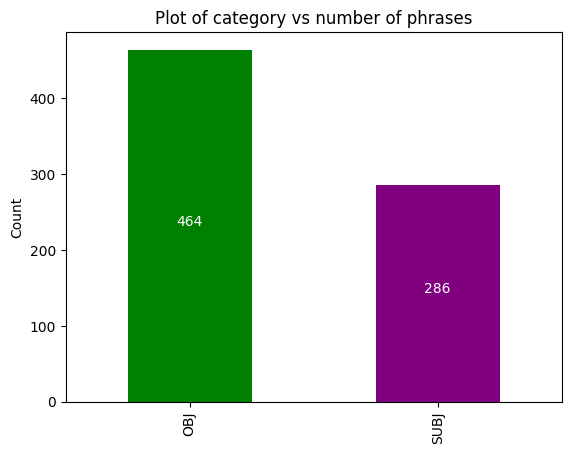

In [5]:
ax = value_counts.plot(kind='bar', color=['green', 'purple'])
plt.title('Plot of category vs number of phrases')
plt.ylabel('Count')

for i, v in enumerate(value_counts):
  ax.text(i, v - (v//2), str(v), color='white', ha='center')

plt.show()

## Determining the number of unique words

In [6]:
all_sentences = ' '.join(train['sentence'].astype(str))

words = pd.Series(all_sentences.split())

word_counts = words.value_counts()
top_words = word_counts.head(50)

print(f"Number of unique words: {len(word_counts)}")

Number of unique words: 3097


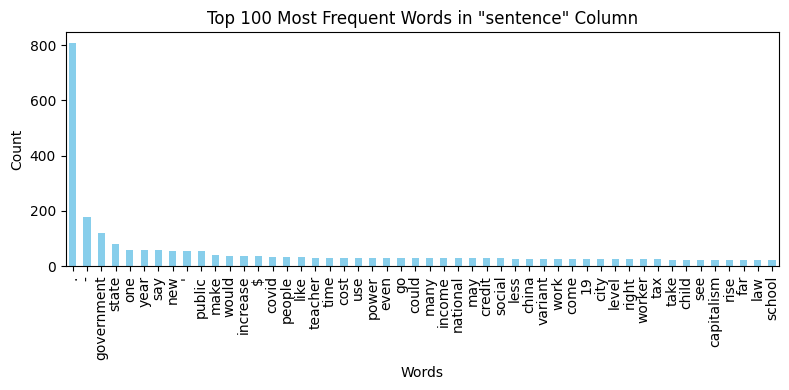

In [7]:
plt.figure(figsize=(8, 4))
top_words.plot(kind='bar', rot=90, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 100 Most Frequent Words in "sentence" Column')
plt.tight_layout()

plt.show()

## Visualizing phrase length

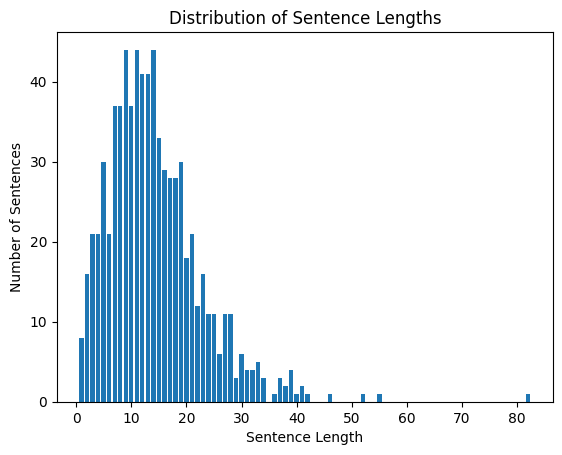

Smallest Sentence Length: 1 words
Largest Sentence Length: 82 words
Average Sentence Length: 14.29 words


In [8]:
train['sentence_length'] = train['sentence'].astype(str).apply(lambda x: len(x.split()))
min_length = train['sentence_length'].min()
max_length = train['sentence_length'].max()

# Step 3: Calculate the average sentence length
average_length = train['sentence_length'].mean()

# Step 4: Plot a graph
sentence_lengths = train['sentence_length'].value_counts().sort_index()

plt.bar(sentence_lengths.index, sentence_lengths.values)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths')
plt.show()

# Step 5: Print the results
print(f"Smallest Sentence Length: {min_length} words")
print(f"Largest Sentence Length: {max_length} words")
print(f"Average Sentence Length: {average_length:.2f} words")

## Phrases with less than 4 words?

Questions:

* Characters such as $, -, ., %
* Removing all stop words causes some sentences to be less than 4 words. Examples shown below


In [9]:
train['sentence_split'] = train['sentence'].astype(str).apply(lambda x: x.split())

In [10]:
result_df = train[train['sentence_split'].apply(len) == 2]

In [11]:
result_df

,sentence_id,sentence,label,sentence_length,sentence_split
89,7d348c76-ca27-416a-a0b8-32975447061c,drown .,0,2,"[drown, .]"
94,df1c5aba-a52a-44a5-b8ad-6a9f28ae476f,absolutely .,0,2,"[absolutely, .]"
98,99296270-b6b0-4693-b39d-c833be678562,someone .,0,2,"[someone, .]"
152,c037ed99-d375-46d2-ad8d-91097a8f47d9,warning come,0,2,"[warning, come]"
292,1740ae0d-8ea6-4f93-bbd5-a3275b5e8d97,teacher unhappy,0,2,"[teacher, unhappy]"
302,d1b8921c-658c-4422-ad6c-3ff0666c79f4,popular taxis,0,2,"[popular, taxis]"
461,93a28974-cb99-4232-aca6-386033082974,teacher unhappy,0,2,"[teacher, unhappy]"
498,07909b41-957d-437c-abbd-a312cc12bf7e,go .,0,2,"[go, .]"
506,b3a27024-066f-4f6e-bcef-7ac239f61752,course .,1,2,"[course, .]"
572,66016edd-6580-4316-87a7-acf0e1d9f29d,suppose .,0,2,"[suppose, .]"
